In [268]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mserr

In [269]:
trainx_df = pd.read_csv("train.csv", index_col="Id")
trainy_df = trainx_df["SalePrice"]
trainx_df.drop("SalePrice", axis=1, inplace=True)
testx_df = pd.read_csv("test.csv", index_col="Id")

In [270]:
print(trainx_df.shape, testx_df.shape)

(1460, 79) (1459, 79)


In [271]:
sample_size = len(trainx_df)
columns_with_null_values = [[col, float(trainx_df[col].isnull().sum()) / float(sample_size)] for col in trainx_df.columns if trainx_df[col].isnull().sum()]

In [272]:
columns_to_drop = [x for (x,y) in columns_with_null_values if y > .3]
columns_to_drop

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [273]:
trainx_df.drop(columns_to_drop, axis=1, inplace=True)
testx_df.drop(columns_to_drop, axis=1, inplace=True)
trainx_df.shape, testx_df.shape

((1460, 74), (1459, 74))

In [274]:
categorical_columns = [col for col in trainx_df.columns if trainx_df[col].dtype == object]
ordinal_columns = [col for col in trainx_df.columns if col not in categorical_columns]
len(categorical_columns),len(ordinal_columns)

(38, 36)

In [275]:
dummy_row = list()
for col in trainx_df.columns:
    if(col in categorical_columns):
        dummy_row.append("dummy")
    else:
        dummy_row.append("")

In [276]:
new_row = pd.DataFrame([dummy_row], columns=trainx_df.columns)
trainx_df = pd.concat([trainx_df, new_row], axis=0, ignore_index=True)
testx_df = pd.concat([testx_df], axis=0, ignore_index=True)

In [277]:
for col in categorical_columns:
    trainx_df[col].fillna(value = "dummy", inplace = True)
    testx_df[col].fillna(value = "dummy", inplace = True)

In [278]:
enc = OneHotEncoder(drop="first", sparse=False)

In [279]:
enc.fit(trainx_df[categorical_columns])
trainx_enc = pd.DataFrame(enc.transform(trainx_df[categorical_columns]))
testx_enc = pd.DataFrame(enc.transform(testx_df[categorical_columns]))

In [280]:
trainx_enc.columns = enc.get_feature_names(categorical_columns)
testx_enc.columns = enc.get_feature_names(categorical_columns)

In [281]:
trainx_df = pd.concat([trainx_df[ordinal_columns], trainx_enc], axis=1, ignore_index=True)
testx_df = pd.concat([testx_df[ordinal_columns], testx_enc], axis=1, ignore_index=True)

In [282]:
trainx_df.drop(trainx_df.tail(1).index, inplace=True)

In [283]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit(trainx_df)

KNNImputer(n_neighbors=2)

In [284]:
trainx_df_filled = imputer.transform(trainx_df)
trainx_df_filled = pd.DataFrame(trainx_df_filled, columns=trainx_df.columns)
testx_df_filled = imputer.transform(testx_df)
testx_df_filled = pd.DataFrame(testx_df_filled, columns=testx_df.columns)

In [285]:
scalar = preprocessing.StandardScaler().fit(trainx_df)
trainx_df = scalar.transform(trainx_df_filled)
testx_df = scalar.transform(testx_df_filled)

In [286]:
X_train, X_test, y_train, y_test = train_test_split(trainx_df, trainy_df.values.ravel(), test_size = 0.3, random_state = 42 )

In [287]:
reg = LinearRegression()
reg = LinearRegression().fit(X_train, y_train)

In [288]:
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.9340340762726554, -9.687203275498376e+24)

In [324]:
regRidge = Ridge(alpha = 0.5, tol = 0.01)
regRidge = regRidge.fit(X_train, y_train)

In [325]:
regRidge.score(X_train, y_train), regRidge.score(X_test, y_test)

(0.934067083646683, 0.7413008243552248)

In [334]:
regRidge = Ridge(alpha = 0.5, tol = 0.01)
regRidge = regRidge.fit(X_train, y_train)
score_train = []
score_test = []
mse_train = []
mse_test = []
alpha = []

for sigma in np.linspace(0.1, 10, 10):
    alpha.append(sigma)
    Ridge_model = regRidge
    score_train.append(round(Ridge_model.score(X_train, y_train), 10))
    score_test.append(round(Ridge_model.score(X_test, y_test), 10))
    mse_train.append(round(mserr(y_train, Ridge_model.predict(X_train)),4))
    mse_test.append(round(mserr(y_test, Ridge_model.predict(X_test)),4))
print(alpha,'\n', score_train, '\n', score_test, '\n', mse_train, '\n', mse_test)


[0.1, 1.2000000000000002, 2.3000000000000003, 3.4000000000000004, 4.5, 5.6, 6.7, 7.800000000000001, 8.9, 10.0] 
 [0.9340670836, 0.9340670836, 0.9340670836, 0.9340670836, 0.9340670836, 0.9340670836, 0.9340670836, 0.9340670836, 0.9340670836, 0.9340670836] 
 [0.7413008244, 0.7413008244, 0.7413008244, 0.7413008244, 0.7413008244, 0.7413008244, 0.7413008244, 0.7413008244, 0.7413008244, 0.7413008244] 
 [396822232.8919, 396822232.8919, 396822232.8919, 396822232.8919, 396822232.8919, 396822232.8919, 396822232.8919, 396822232.8919, 396822232.8919, 396822232.8919] 
 [1805227103.5269, 1805227103.5269, 1805227103.5269, 1805227103.5269, 1805227103.5269, 1805227103.5269, 1805227103.5269, 1805227103.5269, 1805227103.5269, 1805227103.5269]


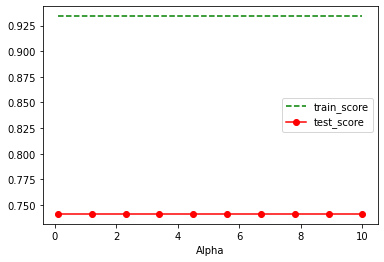

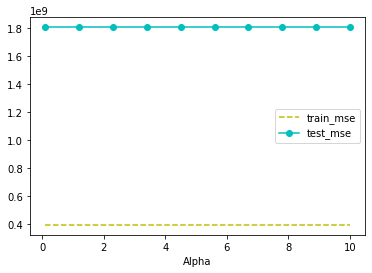

In [339]:
plt.figure(1)
plt.plot(alpha, score_train, 'g--', label="train_score")
plt.plot(alpha, score_test, 'r-o', label="test_score")
plt.xlabel("Alpha")
plt.legend()
plt.figure(2)
plt.plot(alpha, mse_train, 'y--', label = "train_mse")
plt.plot(alpha, mse_test, 'c-o', label="test_mse")
plt.xlabel("Alpha")
plt.legend()
plt.show()

In [340]:
testpred = pd.DataFrame(regRidge.predict(testx_df))
testpred.to_csv("test_predictions.csv")